# Clustering Activity

In [1]:
# Import necessary libraries
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import adjusted_rand_score, silhouette_score
import skfuzzy.cluster as fuzz
import numpy as np
import matplotlib.pyplot as plt

# Generate a hypothetical dataset
x, y_true = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=1.0)

Exercise: Evaluate four clustering algorithms (K-Means, Fuzzy C-Means, Spectral, and Agglomerative)
1. Apply each clustering algorithm to the dataset where:
- cluster_count = 4
- random_state = 42 (where applicable)
- do not specify affinity, metric, algo, init, linkage (if applicable)
2. Use the **Adjusted Rand index** and **Silhouette Score** to evaluate the clustering performance.
3. Compare the performance of the algorithms based on the aforementioned metrics and decide which algorithm is best suited for the data given.

In [2]:
# Data Visualization via Donut Chart
#define the colors to be used in the plots
colors = ['red', 'blue', 'magenta', 'green', 'cyan', 'navy', 'violet']
fig_size = 6

def make_donut_data(num_classes=2, num_samples=100, radius_delta=1):
    circle_all = np.array([])
    class_lbls = np.array([])
    
    current_radius = radius_delta * num_classes

    for i in range(num_classes):
        theta = inner_theta = np.random.uniform(0, 2*np.pi, num_samples)

        # Donut data
        circle_x = current_radius * np.cos(theta)
        circle_y = current_radius * np.sin(theta)

        circle_indiv = np.array([circle_x, circle_y]).T
        circle_all = np.vstack((circle_all, circle_indiv)) if circle_all.size else circle_indiv

        class_indiv = np.full(num_samples, i)
        class_lbls = np.concatenate((class_lbls, class_indiv)) if class_lbls.size else class_indiv

        current_radius = current_radius - radius_delta

        
    return circle_all, class_lbls

X,Y = make_donut_data()

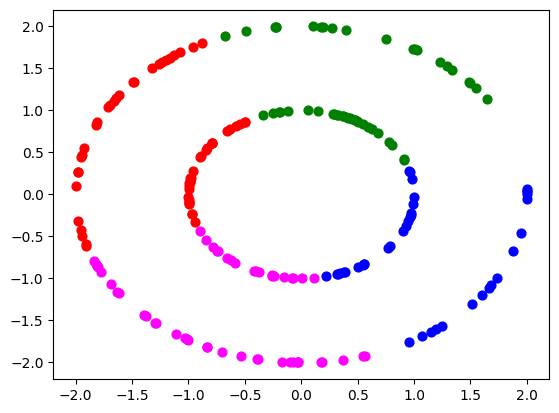

In [3]:
# K-Means Clustering

kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
pred_kmeans = kmeans.fit_predict(X)
rand_kmeans = adjusted_rand_score(Y, pred_kmeans)
sil_kmeans = silhouette_score(X, pred_kmeans)

for index, classes in enumerate(np.unique(pred_kmeans)):
    plt.scatter(X[pred_kmeans == classes, 0], X[pred_kmeans == classes, 1], color=colors[index], s=40)

plt.show()

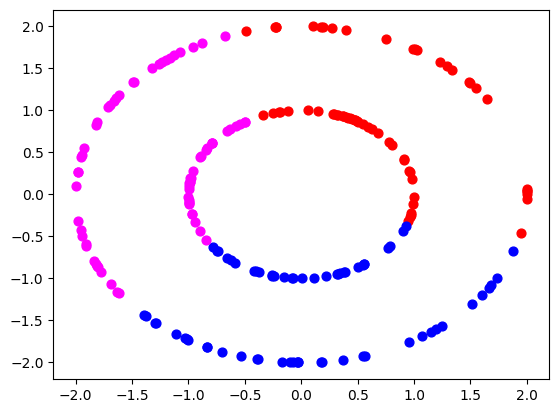

In [4]:
# Fuzzy C-Means Clustering

centers, u, u0, d, jm, p, fpc = fuzz.cmeans(data = X.T, c = classes, m = 1.25, error = 0.05, maxiter = 1000)
pred_cmeans = np.argmax(u, axis=0)
rand_cmeans = adjusted_rand_score(Y, pred_cmeans)
sil_cmeans = silhouette_score(X, pred_cmeans)

for index, classes in enumerate(np.unique(pred_cmeans)):
    plt.scatter(X[pred_cmeans == classes, 0], X[pred_cmeans == classes, 1], color=colors[index], s=40)

plt.show()

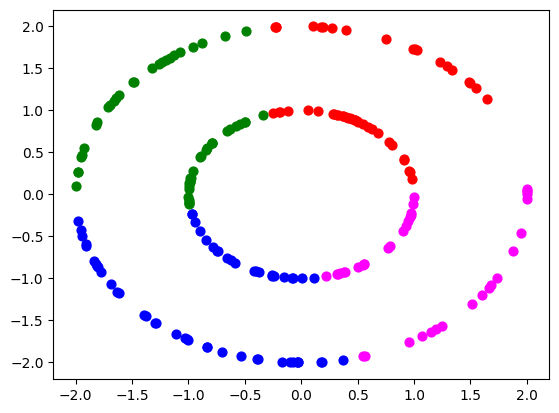

In [5]:
# Spectral Clustering Scatter Plot
# Spectral Clustering

spectral = SpectralClustering(n_clusters=4)
pred_spectral = spectral.fit_predict(X)
rand_spectral = adjusted_rand_score(Y, pred_spectral)
sil_spectral = silhouette_score(X, pred_spectral)

for index, classes in enumerate(np.unique(pred_spectral)):
    plt.scatter(X[pred_spectral == classes, 0], X[pred_spectral == classes, 1], color=colors[index], s=40)
    
plt.show()

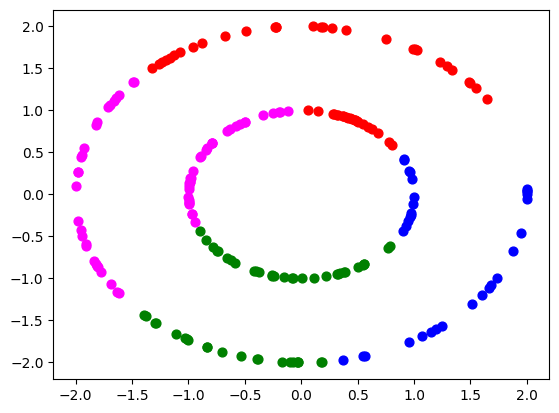

In [6]:
# Agglomerative Clustering

agglo = AgglomerativeClustering(n_clusters=4)
pred_agglo = agglo.fit_predict(X)
rand_agglo = adjusted_rand_score(Y, pred_agglo)
sil_agglo = silhouette_score(X, pred_agglo)

for index, classes in enumerate(np.unique(pred_agglo)):
    plt.scatter(X[pred_agglo == classes, 0], X[pred_agglo == classes, 1], color=colors[index], s=40)

plt.show()

In [8]:
# Evaluation Metrics (Adjusted Rand Index)

print(f"Adjusted Rand Score (K-Means) : {rand_kmeans:.4f}")
print(f"Adjusted Rand Score (Fuzzy C-Means) : {rand_cmeans:.4f}")
print(f"Adjusted Rand Score (Spectral) : {rand_spectral:.4f}")
print(f"Adjusted Rand Score (Agglomerative) : {rand_agglo:.4f}")

Adjusted Rand Score (K-Means) : 0.0074
Adjusted Rand Score (Fuzzy C-Means) : 0.0042
Adjusted Rand Score (Spectral) : 0.0097
Adjusted Rand Score (Agglomerative) : 0.0041


In [9]:
# Evaluation Metrics (Silhouette Score)

print(f"Silhouette Score (K-Means) : {sil_kmeans:.4f}")
print(f"Silhouette Score (Fuzzy C-Means) : {sil_cmeans:.4f}")
print(f"Silhouette Score (Spectral) : {sil_spectral:.4f}")
print(f"Silhouette Score (Agglomerative) : {sil_agglo:.4f}")

Silhouette Score (K-Means) : 0.4044
Silhouette Score (Fuzzy C-Means) : 0.4112
Silhouette Score (Spectral) : 0.4011
Silhouette Score (Agglomerative) : 0.3439
